In [ ]:
from sklearn.datasets import load_wine
from sklearn.datasets.samples_generator import make_blobs
from sklearn.metrics import normalized_mutual_info_score
from sklearn.cluster import KMeans
import numpy as np
from MaxEnt import maxEnt
import matplotlib.pyplot as plt
from RIM import RIM
from MaxEnt import posterioriProbability

def preprocessData(X):
    x = (X - X.mean(0)) / X.std(0)
    ones = np.ones((X.shape[0], 1))
    return np.append(ones, x, axis=1)

def analyze(K, D, N, X, y, alfas):
    #kMeans
    kMeans = KMeans(K)
    kMeans.fit(X)

    #maxEnt
    for alfa in alfas:
        lambdas = maxEnt(X, kMeans.labels_, kMeans.n_clusters, D, N, alfa)
        yEnt = assignClusters(lambdas, X, K, N)
        lambdas = RIM(X, yEnt, K, D, N, alfa, lambdas)
        yRIM = assignClusters(lambdas, X, K, N)
        print("alfa: " + str(alfa))
        print("k: " + str(len(set(yRIM))))
        print("score: " + str(normalized_mutual_info_score(y, yRIM)))
        plt.scatter(X[:, 1], X[:, 2], c=yRIM)
        plt.show()

def assignClusters(lambdas, X, K, N):
    y = []

    for i in range(N):
        den, cou = posterioriProbability(X[i], lambdas, K)
        cou /= den
        y.append(np.array(cou).argmax())
    return y

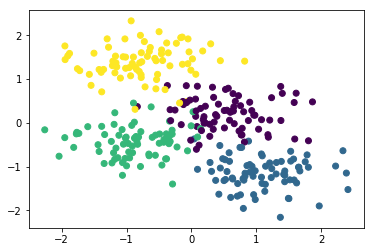

alfa: 1
k: 5
score: 0.5507089748706662


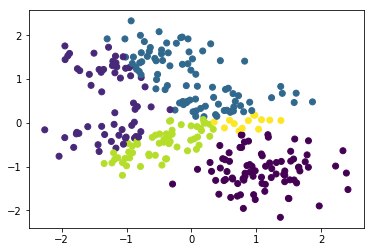

alfa: 0.1
k: 3
score: 0.5010866683629095


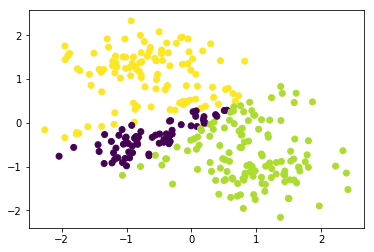

alfa: 0.01
k: 5
score: 0.5587098636941692


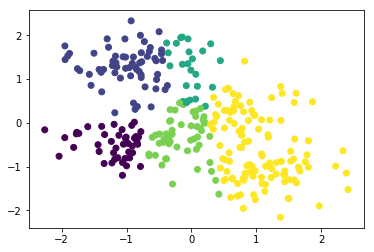

alfa: 0
k: 5
score: 0.4975300410104556


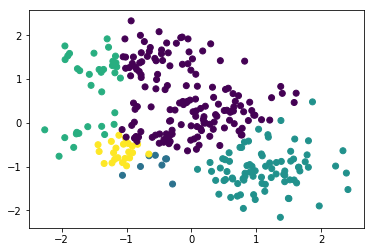

In [19]:
K = 10
N = 300
X, y = make_blobs(n_samples=N, centers=4, n_features=2, random_state=0)
XNormalize = preprocessData(X)
plt.scatter(XNormalize[:, 1], XNormalize[:, 2], c=y)
plt.show()
alfas = [1, 0.1, 0.01, 0]
analyze(K, XNormalize.shape[1], N, XNormalize, y, alfas)

k: 3


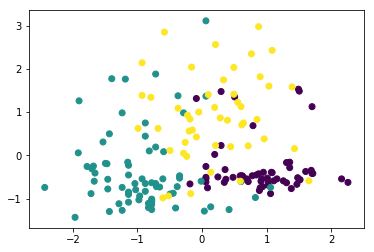

alfa: 1
k: 3
score: 0.32529273559526817


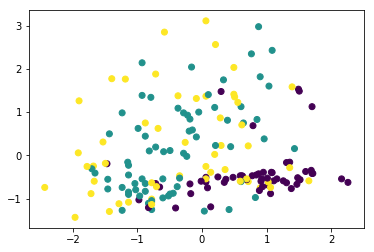

alfa: 0.5
k: 3
score: 0.3792438643773497


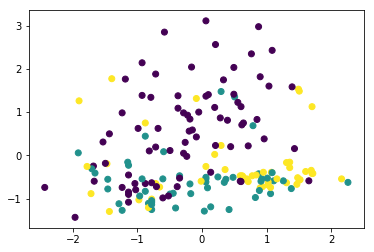

alfa: 0.1
k: 3
score: 0.3606761812863424


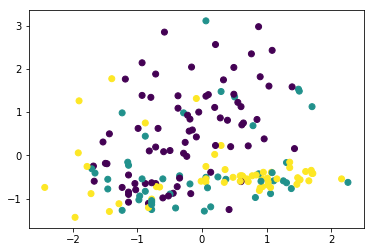

alfa: 0
k: 3
score: 0.38879344979066716


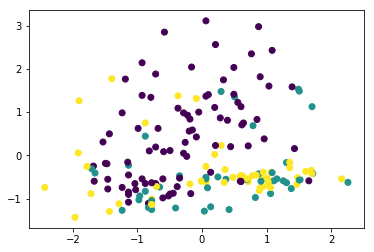

In [36]:
K = 3
data = load_wine()
X = np.array(data.data)
y = data.target
print("k: " + str(len(set(y))))
XNormalize = preprocessData(X)
plt.scatter(XNormalize[:, 1], XNormalize[:, 2], c=y)
plt.show()
alfas = [1, 0.5, 0.1, 0]
analyze(K, XNormalize.shape[1], X.shape[0], XNormalize,y, alfas)